In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from pathlib import Path
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
image = []
index = []

i = 5
for path in glob.glob("/content/gdrive/My Drive/Data_set/train/images/*"): 
  if (i>0):        # check if image exists or not
    img = cv2.imread(path, cv2.IMREAD_COLOR)       # read image using opencv 
    img = cv2.resize(img, (224,224))                                                                   #resize image 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    image.append(img)
    p = path.split("/")[-1]
    index.append(p)
    i = i-1

In [ ]:
images = np.array(image)

In [ ]:
images.shape

(5, 224, 224, 3)

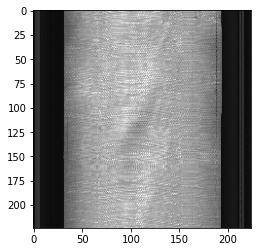

In [ ]:
plt.imshow(images[3])

In [ ]:
def defect_image(image):
  img = image.copy()
  hsv = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  h = hsv[:,:,0]
  s = hsv[:,:,1]
  v = hsv[:,:,2]
  blr = cv2.blur(v,(15,15))
  dst = cv2.fastNlMeansDenoising(blr,None,10,7,21)
  _,binary = cv2.threshold(dst,127,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  kernel = np.ones((5,5))
  erosion = cv2.erode(binary, kernel, iterations = 1)

  dilation = cv2.dilate(binary, kernel, iterations = 1)

  if (dilation == 0).sum() > 1:
    print("defective fabric")
    contours,_ = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for i in contours:
      if (cv2.contourArea(i)<261121.0):
        cv2.drawContours(img,i,-1,(0,255,0), 3)
  else:
    print("Good fabric")

  return image,hsv,v,blr,dst,binary,dilation,img

In [ ]:
img = cv2.imread("img_21_8211.jpg")
image, hsv,v,blr,dst,binary,dilation,img = defect_image(img)

fig, ax = plt.subplot(2,4,figsize = (15,10))
ax[0,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

ax[0,1].imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB))

ax[0,2].imshow(cv2.cvtColor(v, cv2.COLOR_BGR2RGB))

ax[0,3].imshow(cv2.cvtColor(blr, cv2.COLOR_BGR2RGB))

ax[1,0].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

ax[1,1].imshow(binary, cmap = "gray")
ax[1,2].imshow(dilation, cmap = "gray")
ax[1,3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

fig.tight_layout()

defective fabric


ValueError: ignored

<Figure size 432x288 with 0 Axes>

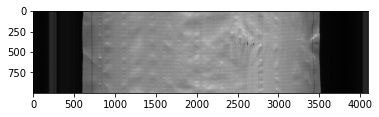

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

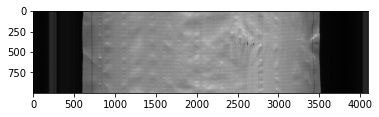

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

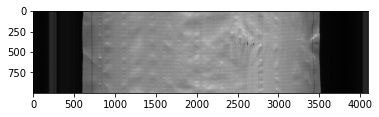

In [ ]:
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB))